### Data Description

- url : This columns contains the url of the restaurant on the Zomato website
- address : This columns contains the address of the restaurant in Bangalore
- name : The name of the restaurant
- online_order : whether online ordering is available in the restaurant or not
- book_table : table book option available or not
- rate : contains the overall rating of the restaurant out of 5
- votes : contains total number of upvotes for the restaurant
- phone : This columns contains the phone number of the restaurant
- location : This columns contains the neighborhood in which the restaurant is located
- rest_type : restaurant type
- dish_liked : dishes people liked in the restaurant
- cuisines : food styles, separated by comma
- approx_cost(for two people) : contains the approximate cost of meal for two people
- reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
- menu_item : contains list of menus available in the restaurant
- listed_in(type) : type of meal
- listed_in(city) : contains the neighborhood in which the restaurant is located

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Reading the dataset

In [2]:
data = pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Cleaning

In [3]:
#No. of columns and rows dataset
data.shape

(51717, 17)

In [4]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
#Finding max, min, count, etc. of the numeric columns
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
#Discovering all columns
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
#Dropping the columns which are not needed
data.drop(['url', 'phone', 'dish_liked'], axis=1, inplace=True)

In [8]:
#Checking for the duplicate values
data.duplicated().sum()

43

In [9]:
#Dropping all the duplicate values
data.drop_duplicates(inplace=True)

In [10]:
#Looking for the null or missing value
data.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

<AxesSubplot:>

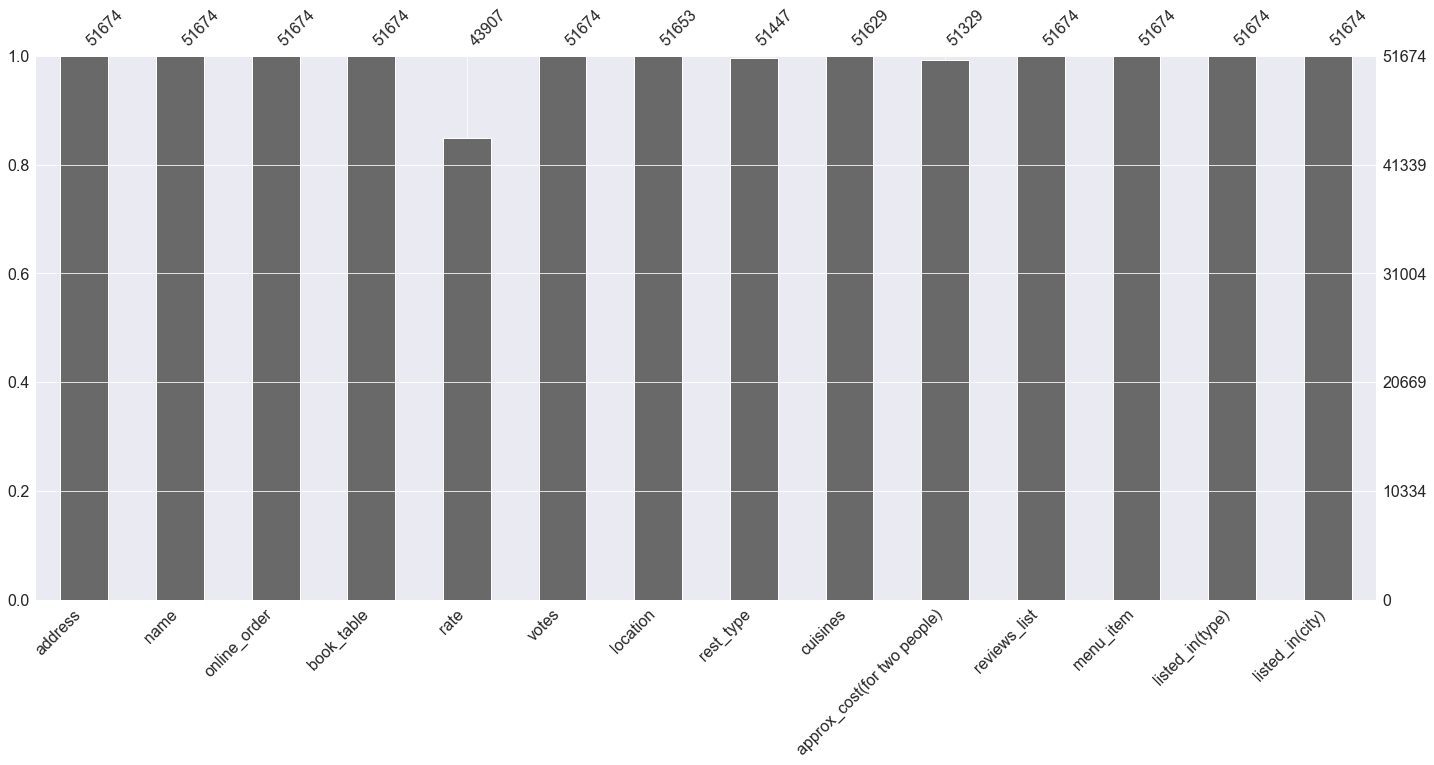

In [11]:
#Visuallizing missing data
import missingno as msno
msno.bar(data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

In [13]:
#Dropping the null values from the dataset
data.dropna(how='any', inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [15]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [16]:
data = data.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [17]:
data.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [18]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [19]:
# Replacing ',' and then converting the data type to int
data['cost'] = data['cost'].astype(str)
data['cost'] = data['cost'].apply(lambda x: x.replace(',', ''))
data['cost'] = data['cost'].astype('int64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost          43499 non-null  int64 
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int64(2), object(12)
memory usage: 5.0+ MB


In [21]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
data = data.loc[data['rate'] != 'NEW']
data = data.loc[data.rate != '-'].reset_index(drop=True)
remove_for_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
data.rate = data.rate.apply(remove_for_slash).str.strip().astype(float)
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [23]:
#Adjust the column values
data.name = data.name.apply(lambda x:x.title())
data.online_order.replace(('Yes', 'No'), (True, False), inplace=True)
data.book_table.replace(('Yes', 'No'), (True, False), inplace=True)

In [24]:
#Looking at the data after transformation
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [25]:
#Encode the input variable
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'votes', 'cost'])]:
        data[column] = data[column].factorize()[0]
    return data

data_en = Encode(data.copy())
data_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600,4,0,0,0


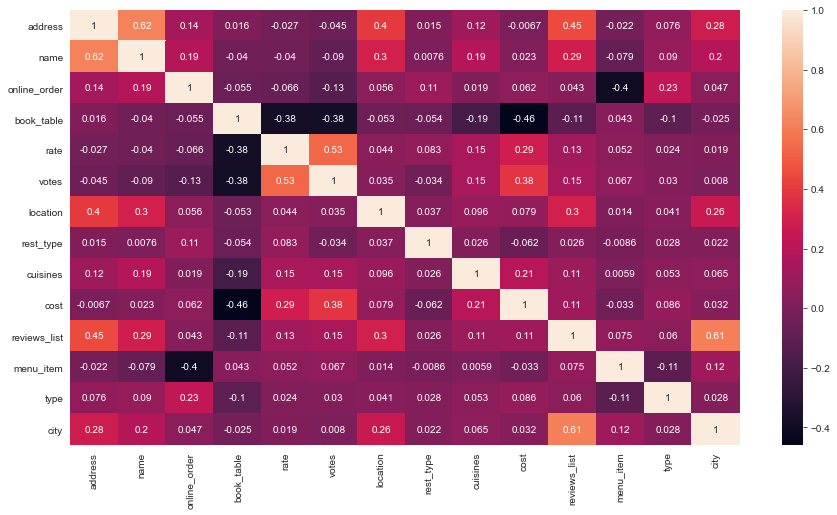

In [26]:
corr = data_en.corr(method = 'kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
sns.color_palette("viridis", as_cmap=True);

## Exploratory Data Analysis

<b>Restaurants Online Delivery Status<b/>

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


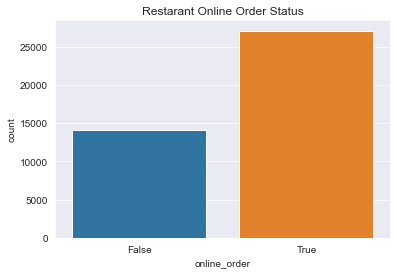

In [27]:
sns.countplot(data['online_order'])
plt.title('Restarant Online Order Status');

- There are more than 25000 resataurant with online order option available, but there are also many restaurant who does not accept online orders.

Pie Chart with percentages of restaurants Accepting and Not Accepting Online orders

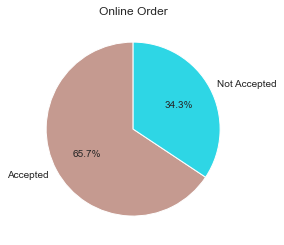

In [28]:
labels = ['Accepted', 'Not Accepted']
values = data['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
color = ['#C59A90', '#2ED6E5']
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors = color)
plt.title('Online Order');

<b>Restaurants allowing table booking option<b/>

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


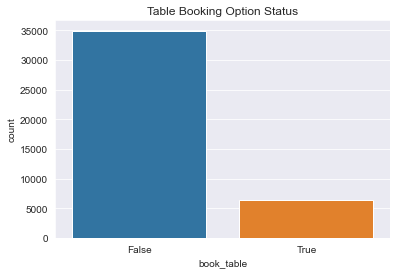

In [29]:
sns.countplot(data['book_table'])
plt.title('Table Booking Option Status');

- There is majority of restaurants where table booking option is not available.

#### Table Booking Rate vs Normal Rate

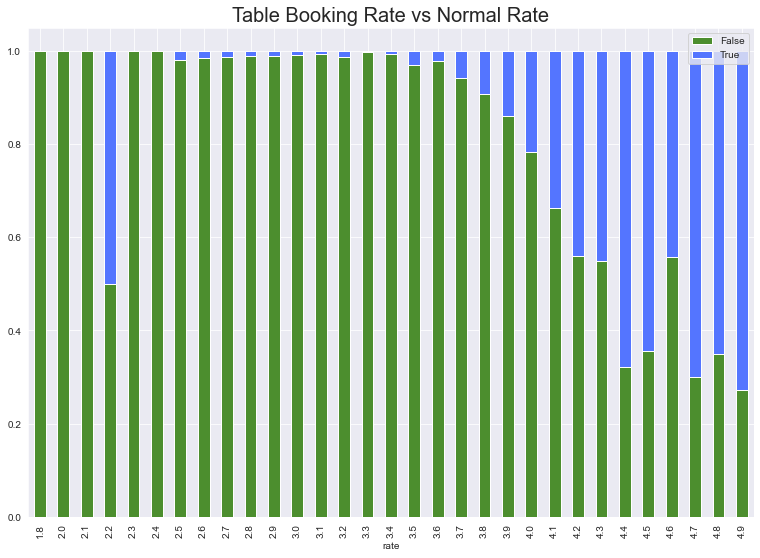

In [30]:
plt.rcParams['figure.figsize']= (13,9)
x = pd.crosstab(data['rate'], data['book_table'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#4C8E2E','#5475FF'])
plt.title('Table Booking Rate vs Normal Rate', fontsize=20)
plt.legend(loc='upper right');

- Restaurants with high rating mostly have table booking option available.
- Towards the low ratings restaurants, more than 60% restaurants with rating of 2.2 have table booking options available. 

#### Location Count

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


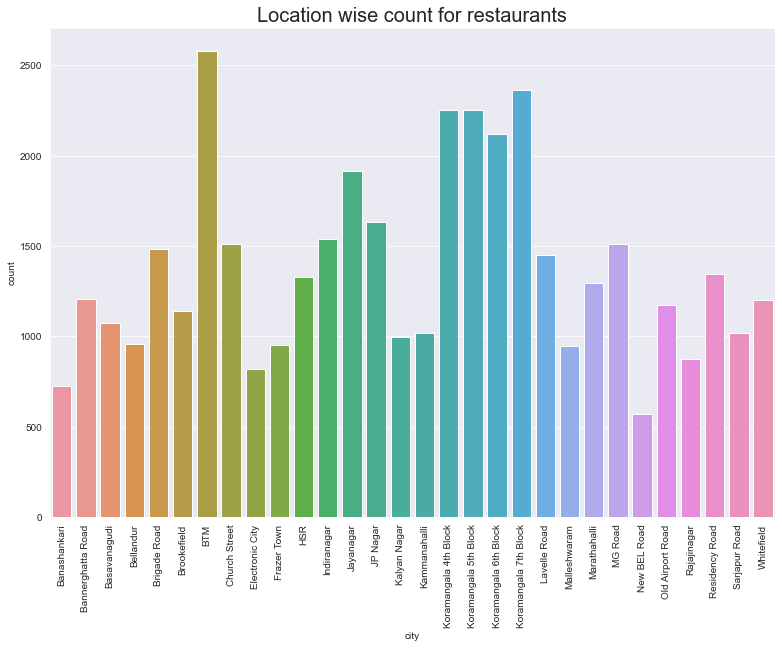

In [31]:
sns.countplot(data['city'])
plt.title('Location wise count for restaurants', fontsize=20)
plt.xticks(rotation = 'vertical');

- BTM is city with highest number of restaurant (more than 2500) followed by Koramangala 7th Block.

- Place with least number of restaurnant is New BEL Road.

#### Normal Distribution Rest Type - Rating

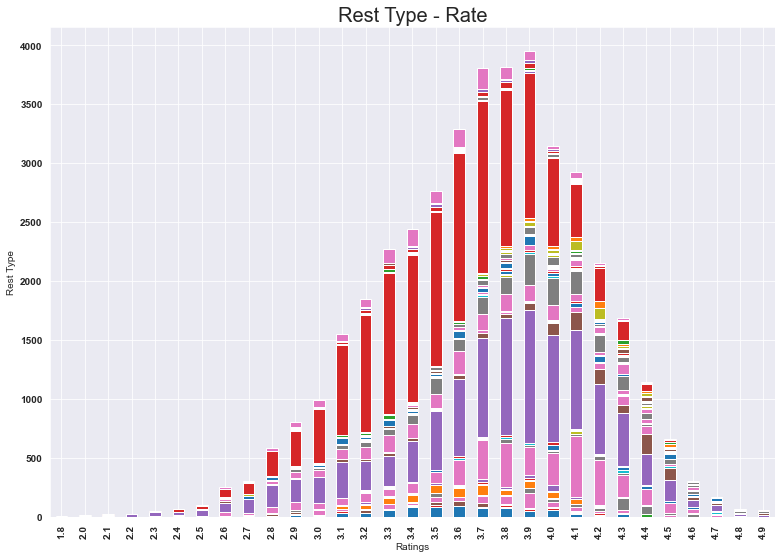

In [32]:
pd.crosstab(data['rate'], data['rest_type']).plot(kind='bar', stacked=True, legend=None)
plt.xlabel('Ratings')
plt.ylabel('Rest Type')
plt.title('Rest Type - Rate', fontsize=20)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold');

#### Type of Services

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


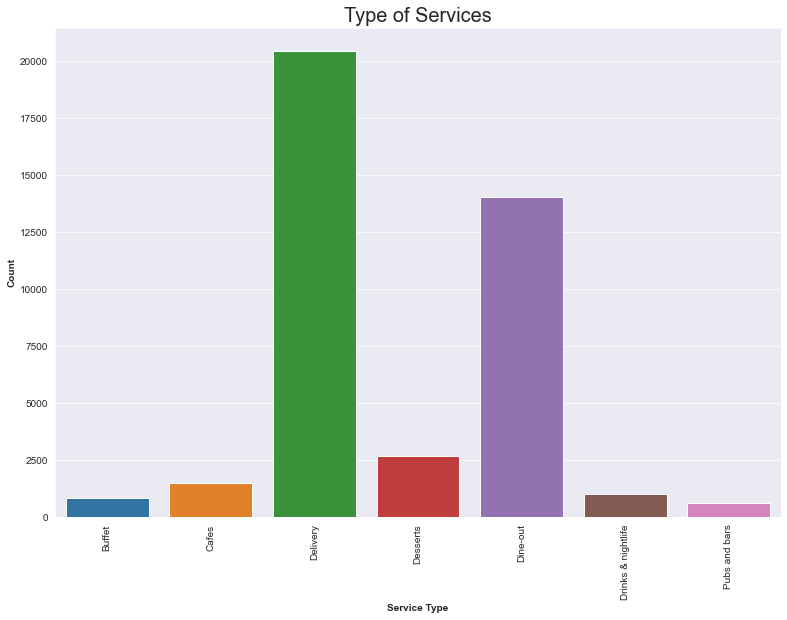

In [33]:
sns.countplot(data['type'])
plt.xlabel('Service Type', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Type of Services', fontsize=20)
plt.xticks(fontsize=10, rotation='vertical')
plt.yticks(fontsize=10);

- There are 7 types of services, and out of those Delivery, Dine-Out, and Desserts (ascending order) has the highest the number of frequency.
- Pubs and Bars have the least frequency.

#### Normal Distribution Type and Ratings

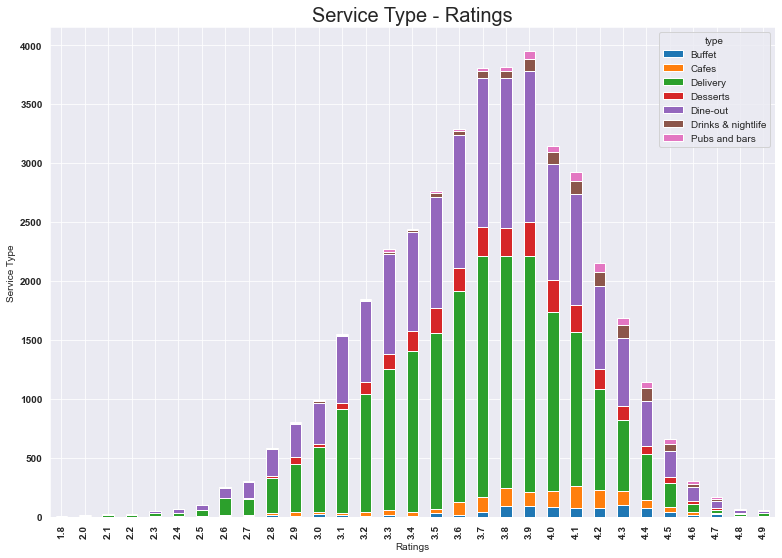

In [34]:
pd.crosstab(data['rate'], data['type']).plot(kind='bar', stacked=True)
plt.xlabel('Ratings')
plt.ylabel('Service Type')
plt.title('Service Type - Ratings', fontsize=20)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold');

#### No. of Restaurants in Locations

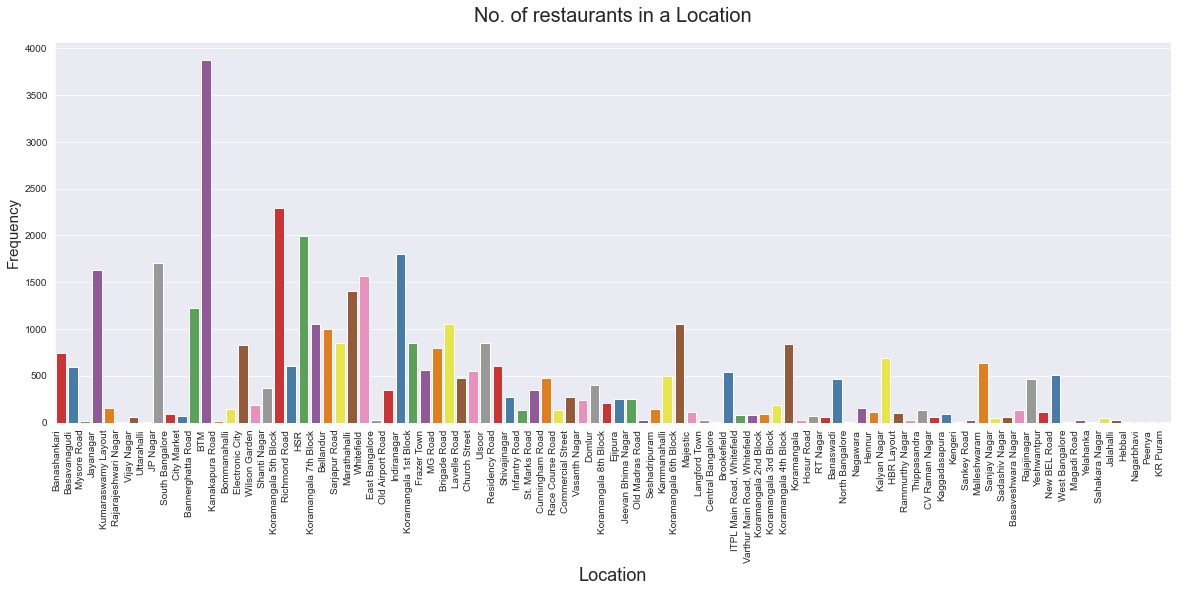

In [35]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('No. of restaurants in a Location',size = 20,pad=20);

- BTM has the highest frequency of Restaurants.

#### Restaurant Types

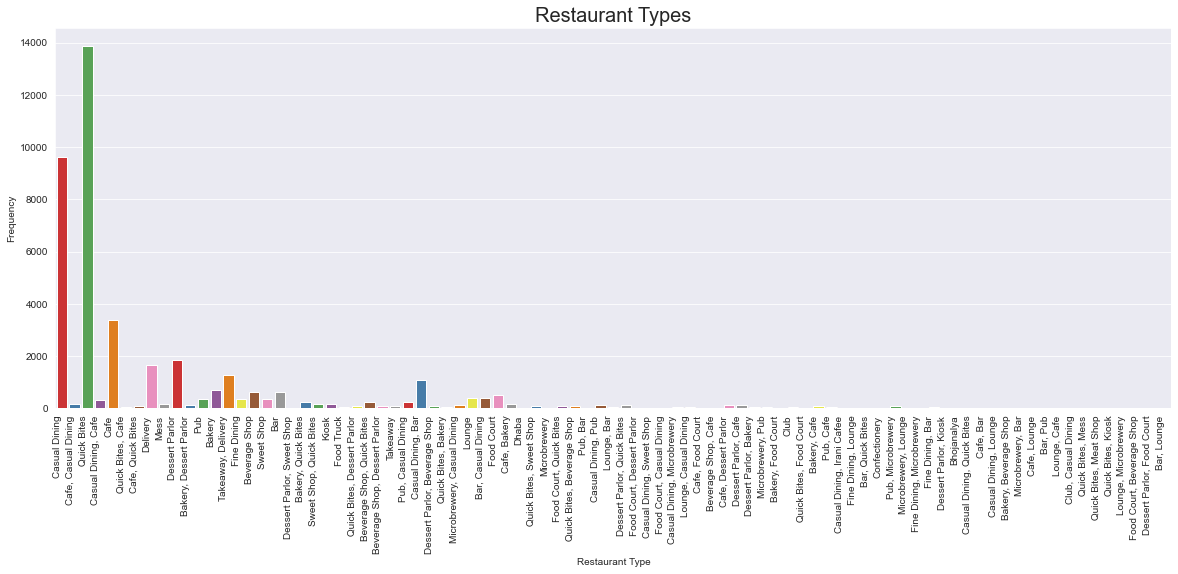

In [36]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="rest_type",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Restaurant Type')
plt.ylabel('Frequency')
plt.title('Restaurant Types', fontsize=20)
plt.yticks(fontsize=10);

- Quick Bites has the highest frquency in Restaurant Types followed by Casual Dining.

#### Restaurant Popularity

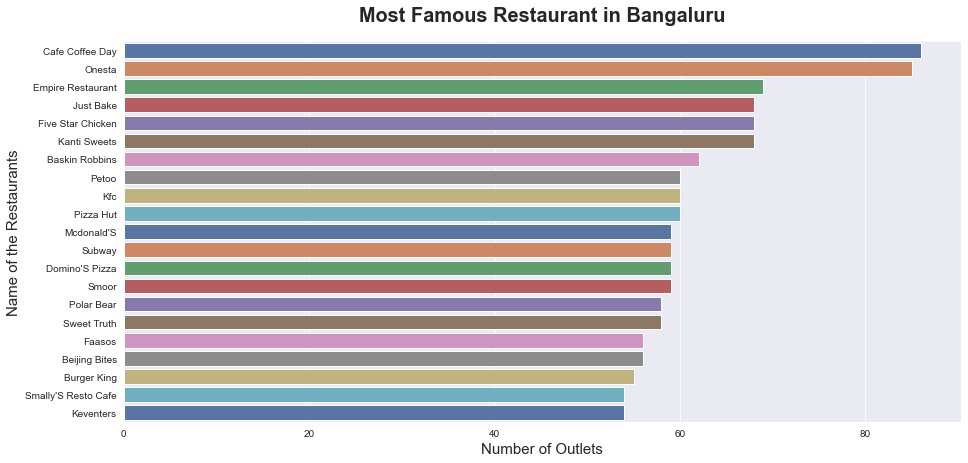

In [37]:
plt.figure(figsize=(15,7))
outlets = data['rate'].groupby(data['name']).count().sort_values(ascending=False)[:21]
sns.barplot(x = outlets, y = outlets.index, palette='deep')
plt.title('Most Famous Restaurant in Bangaluru', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Number of Outlets', size = 15)
plt.ylabel('Name of the Restaurants', size = 15);

- The most popular restaurant are Cafe Coffee Day and Onesta with more than 80 outlets.

## Insights From Data

1. Quick bites have the highest frequency in terms of Restaurant Types and the most popular Restaurants are Cafe Coffee Day, Baskin Robbins, Pizza Hut, Burger King, etc. which supports the fact that there are more Quick Bites types of the restaurant than any other.
2. People also like to do casual Dining and the types of services offered by the restaurants support the Insight.
3. People mostly prefer to order food online and Dine-Out.
4. Not many restaurants have online booking options available. Only restaurants with ratings more than 4.0 have the highest number of restaurants with online booking feature available.
5. Not many restaurants bother to have online order options available, which is obvious since there are many food delivery apps available like Zomato, Swiggy, and more which significantly saves the cost.